0    65.866748
1     5.517092
2    33.405685
3          NaN
4    87.171516
dtype: float64
缺失数据占比 9.00%
-------------
0     65.866748
1      5.517092
2     33.405685
3           NaN
4     87.171516
        ...    
95    14.801764
96    26.746237
97    25.876271
98    59.875314
99    20.726841
Length: 100, dtype: float64
72.90994705302103
48.917732310557994
-16.0439453125
20.595703125
150.750732421875
36.852783203125
31.65625
73.375
122.125
finished!


F:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 25454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24067 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21024 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 38500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\anaconda3\lib\site-

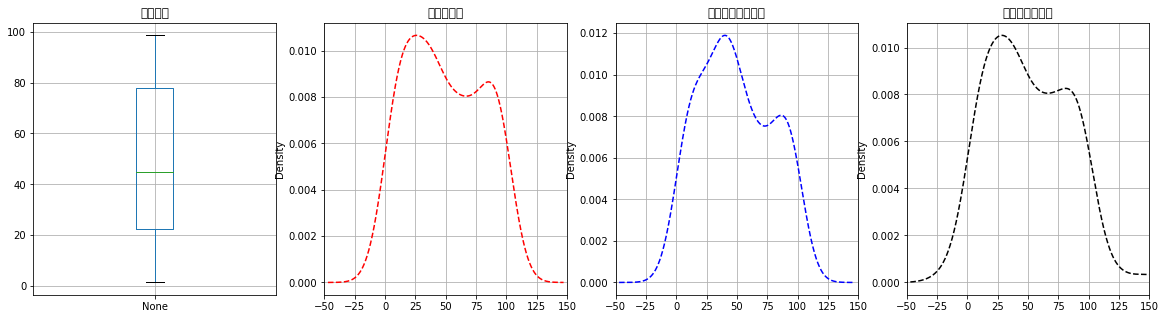

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

data = pd.Series(np.random.rand(100)*100)
data[3,6,33,56,45,66,67,80,90] = np.nan
data.reindex()
print(data.head())
data_na = data[data.isnull()]
print('缺失数据占比 %.2f%%' % (len(data_na)/len(data)*100))

data_c = data.fillna(data.median())
fig, axes = plt.subplots(1,4,figsize = (20,5))
data.plot.box(ax = axes[0] ,grid = True, title = '数据分布')
data.plot(kind = 'kde', style = '--r', ax = axes[1], grid = True, title = '删除缺失值', xlim = [-50,150])
data_c.plot(kind = 'kde', style = '--b', ax = axes[2], grid = True, title = '缺失值填充中位数', xlim = [-50, 150])
print('-------------')
print(data)
   
def na_c(s,n,k=5):
    y = s.reindex(list(range(n-k, n)) + list(range(n+1, n+1+k))) #取数不报错代码段
#    y = s[list(range(n-k,n+1+k))] # 取数报错代码段
    y = y[y.notnull()]  # 剔除空值
    return(lagrange(y.index,list(y))(n))
# 创建函数，做插值，由于数据量原因，以空值前后5个数据（共10个数据）为例做插值

na_re = []
for i in range(len(data)):
    if data.isnull()[i]:
        data[i] = na_c(data,i)
        print(na_c(data,i))
        na_re.append(data[i])
data.dropna(inplace=True)  # 清除插值后仍存在的缺失值
data.plot(kind = 'kde',style = '--k',ax = axes[3],grid = True,title = '拉格朗日插值后',xlim = [-50,150])
print('finished!')

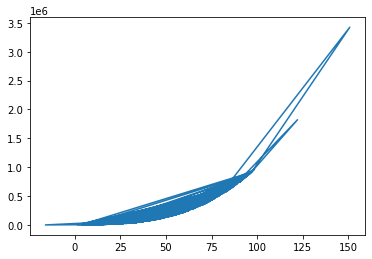

In [6]:
data_x = data * -1
data.append(data_x)
data_y = (data**3)

plt.plot(data,data_y)